In [1]:
from cranberry import Tensor, nn, optim
import numpy as np

In [2]:
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
Tensor.manual_seed(1337)
np.random.seed(1337)
random.seed(1337)

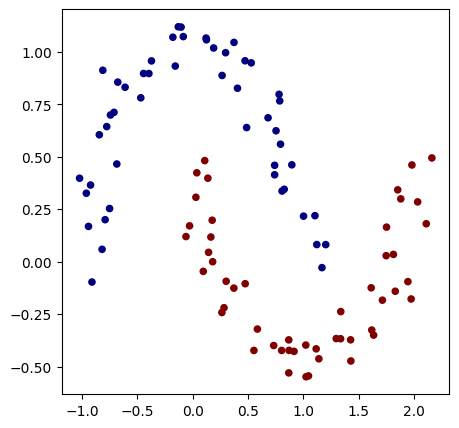

In [4]:
# make up a dataset

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)

y = y * 2 - 1  # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [5]:
model = nn.Sequential(
  nn.Linear(2, 16),
  nn.ReLU(),
  nn.Linear(16, 16),
  nn.ReLU(),
  nn.Linear(16, 1),
)

In [6]:
# loss function
def loss():
  Xb, yb = Tensor(X), Tensor(y)

  # forward the model to get scores
  scores = model(Xb).flatten()

  # svm "max-margin" loss
  data_loss = (1 + -yb * scores).relu().mean()

  # L2 regularization
  alpha = 1e-4
  reg_loss = alpha * sum((p * p).sum() for p in model.parameters())
  total_loss = data_loss + reg_loss

  # also get accuracy
  accuracy = (yb.numpy() > 0) == (scores.numpy() > 0)
  return total_loss, accuracy.mean()


total_loss, acc = loss()
print(total_loss, acc)

Tensor(1.0274624824523926, op=add) 0.47


In [7]:
# optimization
optimizer = optim.SGD(model.parameters(), lr=1.0)

for k in range(100):
  # forward
  optimizer.zero_grad()

  total_loss, acc = loss()

  # backward
  total_loss.backward()

  # update
  optimizer.lr = 1.0 - 0.9 * k / 100
  optimizer.step()

  print(f"step {k} loss {total_loss.item():.4f} accuracy {acc * 100:.1f}%")

step 0 loss 1.0275 accuracy 47.0%
step 1 loss 0.9822 accuracy 64.0%
step 2 loss 0.9547 accuracy 65.0%
step 3 loss 0.9150 accuracy 71.0%
step 4 loss 0.8393 accuracy 71.0%
step 5 loss 0.7278 accuracy 70.0%
step 6 loss 0.6400 accuracy 79.0%
step 7 loss 0.6066 accuracy 82.0%
step 8 loss 0.5284 accuracy 80.0%
step 9 loss 0.6220 accuracy 84.0%
step 10 loss 0.3714 accuracy 80.0%
step 11 loss 0.3343 accuracy 85.0%
step 12 loss 0.2893 accuracy 86.0%
step 13 loss 0.2804 accuracy 89.0%
step 14 loss 0.3013 accuracy 86.0%
step 15 loss 0.3691 accuracy 89.0%
step 16 loss 0.3944 accuracy 81.0%
step 17 loss 0.3160 accuracy 87.0%
step 18 loss 0.2278 accuracy 89.0%
step 19 loss 0.2113 accuracy 91.0%
step 20 loss 0.2004 accuracy 92.0%
step 21 loss 0.1935 accuracy 93.0%
step 22 loss 0.1880 accuracy 92.0%
step 23 loss 0.2160 accuracy 91.0%
step 24 loss 0.3084 accuracy 90.0%
step 25 loss 0.3075 accuracy 86.0%
step 26 loss 0.2319 accuracy 93.0%
step 27 loss 0.1753 accuracy 93.0%
step 28 loss 0.2142 accuracy 9

(-1.548639298268643, 1.951360701731357)

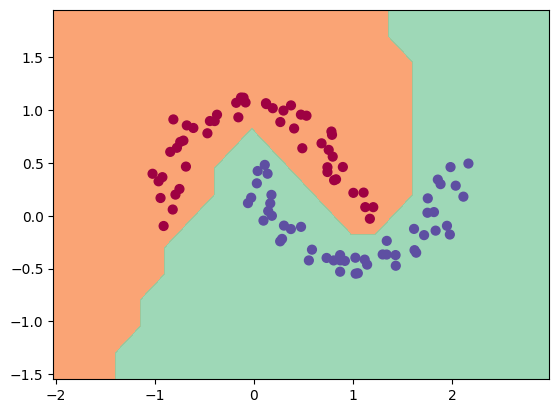

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = Tensor(Xmesh)
scores = model(inputs)
Z = (scores.numpy() > 0).reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())